# Group No : 7 (Group Members : Lakesh Khatri)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_csv('laptops_data.csv')

In [3]:
data.head()

Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               Storage                           GPU Operating System  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2            256GB SSD         Intel HD Graphics 620            No OS   
3            512GB SSD            AMD Radeon Pro 455            macOS   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS   

  Operating System Version  Weight        Price  
0                      NaN  1.37kg  11912523.48  
1                      NaN  1.34kg   7993374.48  
2                      NaN  1.86kg   5112900.00  
3                      NaN  1.83kg  22563005.40  
4                      NaN  1.37kg  16037611.20

In [4]:
data.shape

(977, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [6]:
print("Duplicates:", data.duplicated().sum())

Duplicates: 0


In [7]:
data.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
Storage                       0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [8]:
# Remove unnecessary columns 
data.drop(columns=['Operating System Version','Model Name'], inplace = True)

In [9]:
data.head()

Manufacturer   Category Screen Size                              Screen  \
0        Apple  Ultrabook       13.3"  IPS Panel Retina Display 2560x1600   
1        Apple  Ultrabook       13.3"                            1440x900   
2           HP   Notebook       15.6"                   Full HD 1920x1080   
3        Apple  Ultrabook       15.4"  IPS Panel Retina Display 2880x1800   
4        Apple  Ultrabook       13.3"  IPS Panel Retina Display 2560x1600   

                          CPU   RAM              Storage  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            GPU Operating System  Weight        Price  
0  Intel Iris Plus Graphics 640            macOS  1.37kg  11912523.48  
1        Intel HD Graphics 6000            macOS  1.34kg   7993374.48  
2         Intel HD Graphics 620            No OS  1.86kg   5112900.00  
3            AMD Radeon Pro 455            macOS  1.83kg  22563005.40  
4  Intel Iris Plus Graphics 650            macOS  1.37kg  16037611.20

In [10]:
# Clean and convert RAM and Weight
data['RAM'] = data['RAM'].str.replace('GB', '').astype(int)
data['Weight'] = data['Weight'].str.replace('kg', '').astype(float)

In [11]:
data.head()

Manufacturer   Category Screen Size                              Screen  \
0        Apple  Ultrabook       13.3"  IPS Panel Retina Display 2560x1600   
1        Apple  Ultrabook       13.3"                            1440x900   
2           HP   Notebook       15.6"                   Full HD 1920x1080   
3        Apple  Ultrabook       15.4"  IPS Panel Retina Display 2880x1800   
4        Apple  Ultrabook       13.3"  IPS Panel Retina Display 2560x1600   

                          CPU  RAM              Storage  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            GPU Operating System  Weight        Price  
0  Intel Iris Plus Graphics 640            macOS    1.37  11912523.48  
1        Intel HD Graphics 6000            macOS    1.34   7993374.48  
2         Intel HD Graphics 620            No OS    1.86   5112900.00  
3            AMD Radeon Pro 455            macOS    1.83  22563005.40  
4  Intel Iris Plus Graphics 650            macOS    1.37  16037611.20

In [12]:
# Some column values change in int and float
data['RAM'] = data['RAM'].astype('int64')
data['Weight'] = data['Weight'].astype('float64')
data['Screen Size'] = data['Screen Size'].str.replace('"', '')

# Convert 'Screen size' to float64
data['Screen Size'] = data['Screen Size'].astype('float64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Category          977 non-null    object 
 2   Screen Size       977 non-null    float64
 3   Screen            977 non-null    object 
 4   CPU               977 non-null    object 
 5   RAM               977 non-null    int64  
 6   Storage           977 non-null    object 
 7   GPU               977 non-null    object 
 8   Operating System  977 non-null    object 
 9   Weight            977 non-null    float64
 10  Price             977 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 84.1+ KB


In [14]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data['Price'] = (data['Price'] / 1510).round(2)

In [16]:
data.head()

Manufacturer   Category  Screen Size                              Screen  \
0        Apple  Ultrabook         13.3  IPS Panel Retina Display 2560x1600   
1        Apple  Ultrabook         13.3                            1440x900   
2           HP   Notebook         15.6                   Full HD 1920x1080   
3        Apple  Ultrabook         15.4  IPS Panel Retina Display 2880x1800   
4        Apple  Ultrabook         13.3  IPS Panel Retina Display 2560x1600   

                          CPU  RAM              Storage  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            GPU Operating System  Weight     Price  
0  Intel Iris Plus Graphics 640            macOS    1.37   7889.09  
1        Intel HD Graphics 6000            macOS    1.34   5293.63  
2         Intel HD Graphics 620            No OS    1.86   3386.03  
3            AMD Radeon Pro 455            macOS    1.83  14942.39  
4  Intel Iris Plus Graphics 650            macOS    1.37  10620.93

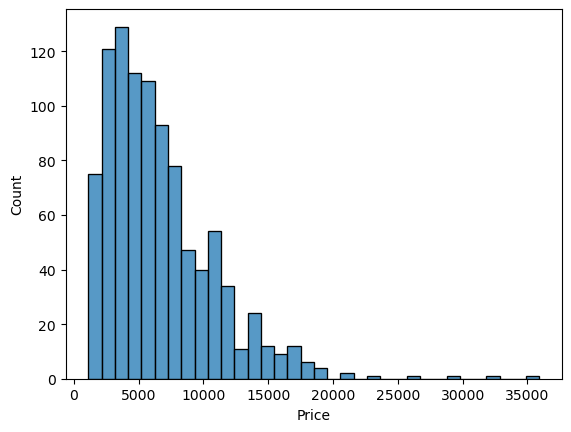

In [17]:
# Visualization
sns.histplot(data['Price']); 
plt.show()

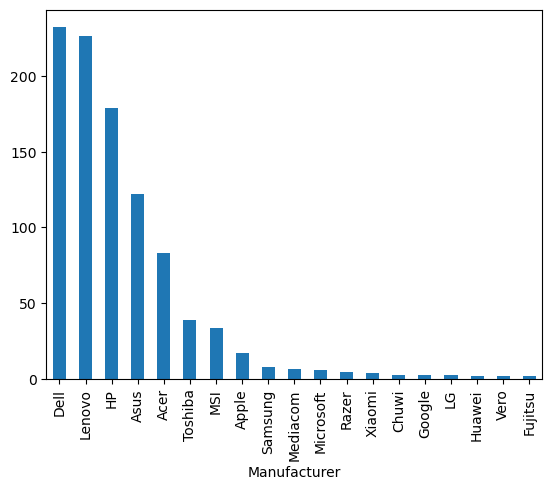

In [18]:
data['Manufacturer'].value_counts().plot(kind='bar'); 
plt.show()

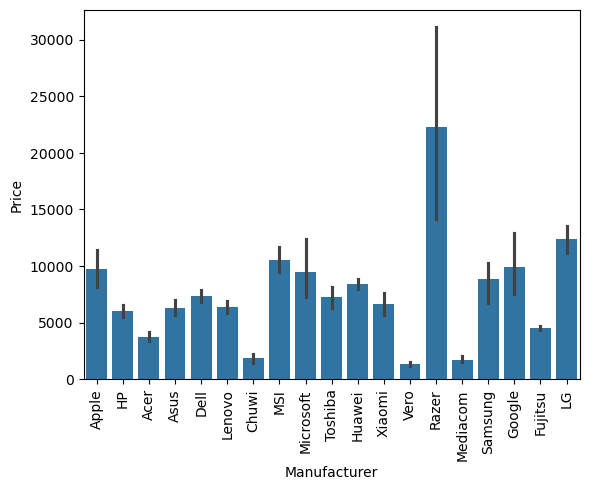

In [19]:
sns.barplot(x=data['Manufacturer'], y=data['Price']); 
plt.xticks(rotation='vertical'); 
plt.show()

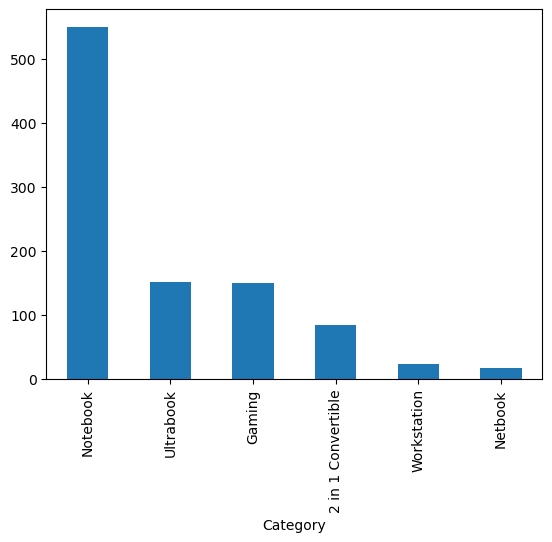

In [20]:
data['Category'].value_counts().plot(kind='bar'); 
plt.show()

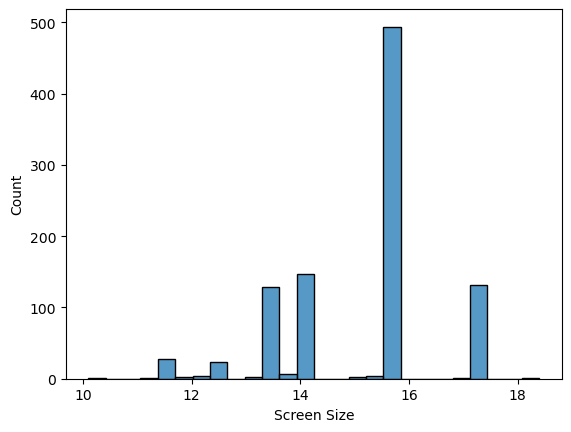

In [21]:
sns.histplot(data['Screen Size']); 
plt.show()

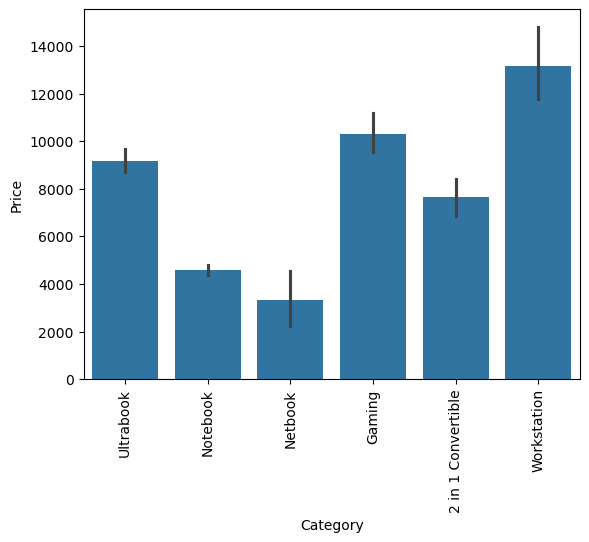

In [22]:
sns.barplot(x=data['Category'], y=data['Price']); 
plt.xticks(rotation='vertical'); 
plt.show()

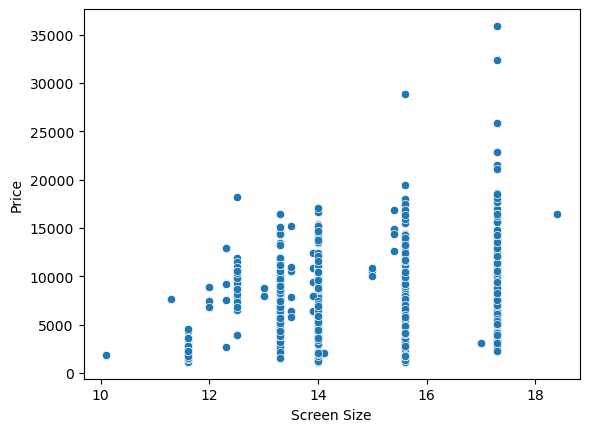

In [23]:
sns.scatterplot(x=data['Screen Size'], y=data['Price']); 
plt.show()

In [24]:
# screen value count
data['Screen'].value_counts()

Screen
Full HD 1920x1080                                397
IPS Panel Full HD 1920x1080                      181
1366x768                                         180
Full HD / Touchscreen 1920x1080                   38
IPS Panel Full HD / Touchscreen 1920x1080         35
1600x900                                          19
Touchscreen 1366x768                              15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                9
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
Touchscreen 2560x1440                              5
4K Ultra HD 3840x2160                              5
1440x900                                           4
IPS Panel Retina Display 2880x1800                 4
IPS Panel 2560x1440                    

In [25]:
# Process 'Screen' column
data['Touchscreen'] = data['Screen'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [26]:
data.sample(5)

Manufacturer  Category  Screen Size                       Screen  \
842           HP  Notebook         17.3                     1600x900   
524         Dell  Notebook         17.3  IPS Panel Full HD 1920x1080   
302       Lenovo  Notebook         17.3                     1600x900   
338         Asus  Notebook         15.6                     1366x768   
799         Dell  Notebook         15.6            Full HD 1920x1080   

                                      CPU  RAM               Storage  \
842            Intel Core i5 7200U 2.5GHz    8               1TB HDD   
524            Intel Core i5 8250U 1.6GHz    8  128GB SSD +  1TB HDD   
302            Intel Core i5 7200U 2.5GHz    6               1TB HDD   
338  Intel Celeron Dual Core N3350 1.1GHz    4               1TB HDD   
799              Intel Core i3 6006U 2GHz    8             256GB SSD   

                         GPU Operating System  Weight    Price  Touchscreen  
842     Nvidia GeForce 930MX          Windows    2.63  5358.75            0  
524           AMD Radeon 530            Linux    2.80  5235.09            0  
302  Nvidia GeForce GTX 940M          Windows    2.80  3821.79            0  
338    Intel HD Graphics 500            Linux    2.00  1619.35            0  
799      AMD Radeon R5 M420X          Windows    2.00  4351.78            0

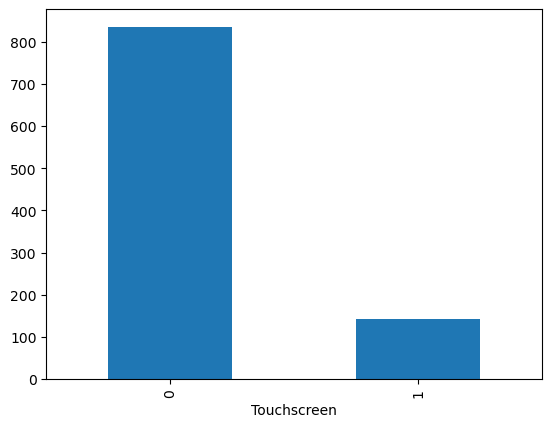

In [27]:
data['Touchscreen'].value_counts().plot(kind='bar')
plt.show()

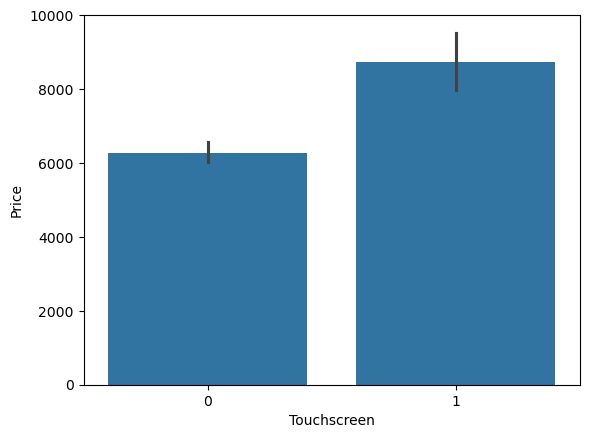

In [28]:
sns.barplot(x = data['Touchscreen'],y = data['Price'])
plt.show()

In [29]:
# create Ips cloumn, if it is ips print 1 otherwise 0
data['Ips'] = data['Screen'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
data.head()

Manufacturer   Category  Screen Size                              Screen  \
0        Apple  Ultrabook         13.3  IPS Panel Retina Display 2560x1600   
1        Apple  Ultrabook         13.3                            1440x900   
2           HP   Notebook         15.6                   Full HD 1920x1080   
3        Apple  Ultrabook         15.4  IPS Panel Retina Display 2880x1800   
4        Apple  Ultrabook         13.3  IPS Panel Retina Display 2560x1600   

                          CPU  RAM              Storage  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            GPU Operating System  Weight     Price  \
0  Intel Iris Plus Graphics 640            macOS    1.37   7889.09   
1        Intel HD Graphics 6000            macOS    1.34   5293.63   
2         Intel HD Graphics 620            No OS    1.86   3386.03   
3            AMD Radeon Pro 455            macOS    1.83  14942.39   
4  Intel Iris Plus Graphics 650            macOS    1.37  10620.93   

   Touchscreen  Ips  
0            0    1  
1            0    0  
2            0    0  
3            0    1  
4            0    1

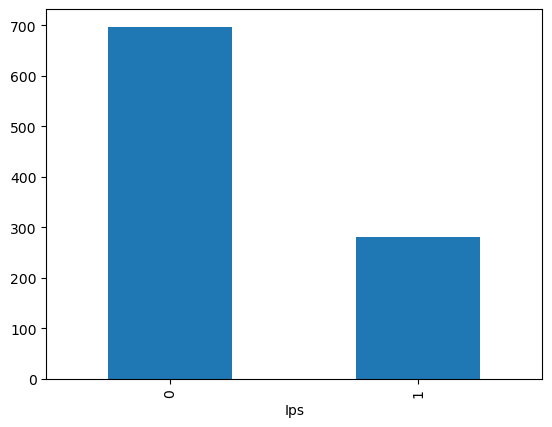

In [31]:
data['Ips'].value_counts().plot(kind='bar')
plt.show()

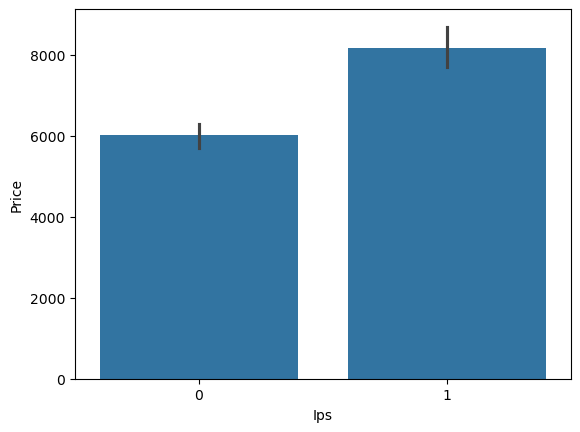

In [32]:
sns.barplot(x = data['Ips'],y = data['Price'])
plt.show()

In [33]:
# Extract resolution
res_split = data['Screen'].str.extract(r'(\d+)\s*x\s*(\d+)')

In [34]:
data['x_res'] = res_split[0].astype(int)
data['y_res'] = res_split[1].astype(int)

In [35]:
data.sample(5)

Manufacturer     Category  Screen Size             Screen  \
861           HP     Notebook         15.6  Full HD 1920x1080   
279       Lenovo     Notebook         17.3  Full HD 1920x1080   
64            HP     Notebook         15.6  Full HD 1920x1080   
707       Lenovo  Workstation         15.6  Full HD 1920x1080   
819         Dell     Notebook         14.0           1366x768   

                            CPU  RAM    Storage                    GPU  \
861  Intel Core i5 7300U 2.6GHz    8  256GB SSD     AMD Radeon R7 M465   
279  Intel Core i7 8550U 1.8GHz    8    2TB HDD   Nvidia GeForce MX150   
64   Intel Core i5 7200U 2.5GHz    8  256GB SSD  Intel HD Graphics 620   
707  Intel Core i7 6500U 2.5GHz   16  512GB SSD    Nvidia Quadro M520M   
819  Intel Core i5 6200U 2.3GHz    4  500GB HDD  Intel HD Graphics 520   

    Operating System  Weight     Price  Touchscreen  Ips  x_res  y_res  
861          Windows    1.84   7943.91            0    0   1920   1080  
279            No OS    2.80   4999.54            0    0   1920   1080  
64           Windows    1.86   4063.23            0    0   1920   1080  
707          Windows    2.18  10923.62            0    0   1920   1080  
819          Windows    1.76   4446.00            0    0   1366    768

In [36]:
data.head()

Manufacturer   Category  Screen Size                              Screen  \
0        Apple  Ultrabook         13.3  IPS Panel Retina Display 2560x1600   
1        Apple  Ultrabook         13.3                            1440x900   
2           HP   Notebook         15.6                   Full HD 1920x1080   
3        Apple  Ultrabook         15.4  IPS Panel Retina Display 2880x1800   
4        Apple  Ultrabook         13.3  IPS Panel Retina Display 2560x1600   

                          CPU  RAM              Storage  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            GPU Operating System  Weight     Price  \
0  Intel Iris Plus Graphics 640            macOS    1.37   7889.09   
1        Intel HD Graphics 6000            macOS    1.34   5293.63   
2         Intel HD Graphics 620            No OS    1.86   3386.03   
3            AMD Radeon Pro 455            macOS    1.83  14942.39   
4  Intel Iris Plus Graphics 650            macOS    1.37  10620.93   

   Touchscreen  Ips  x_res  y_res  
0            0    1   2560   1600  
1            0    0   1440    900  
2            0    0   1920   1080  
3            0    1   2880   1800  
4            0    1   2560   1600

In [37]:
# Compute PPI
data['ppi'] = (((data['x_res']**2 + data['y_res']**2)**0.5) / data['Screen Size']).astype(float)

In [38]:
# Drop unused columns
data.drop(columns=['Screen', 'Screen Size', 'x_res', 'y_res'], inplace=True)

In [39]:
# Touchscreen conver int64, Ips convert int64 and price convert float64
data['Touchscreen'] = data['Touchscreen'].astype('int64')
data['Ips'] = data['Ips'].astype('int64')
data['Price'] = data['Price'].astype('float64')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Category          977 non-null    object 
 2   CPU               977 non-null    object 
 3   RAM               977 non-null    int64  
 4   Storage           977 non-null    object 
 5   GPU               977 non-null    object 
 6   Operating System  977 non-null    object 
 7   Weight            977 non-null    float64
 8   Price             977 non-null    float64
 9   Touchscreen       977 non-null    int64  
 10  Ips               977 non-null    int64  
 11  ppi               977 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 91.7+ KB


In [41]:
# find correlation with price
data.corr(numeric_only=True)['Price']

RAM            0.764005
Weight         0.224415
Price          1.000000
Touchscreen    0.206893
Ips            0.234718
ppi            0.499022
Name: Price, dtype: float64

In [42]:
data.head()

Manufacturer   Category                         CPU  RAM  \
0        Apple  Ultrabook        Intel Core i5 2.3GHz    8   
1        Apple  Ultrabook        Intel Core i5 1.8GHz    8   
2           HP   Notebook  Intel Core i5 7200U 2.5GHz    8   
3        Apple  Ultrabook        Intel Core i7 2.7GHz   16   
4        Apple  Ultrabook        Intel Core i5 3.1GHz    8   

               Storage                           GPU Operating System  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS    1.34   
2            256GB SSD         Intel HD Graphics 620            No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455            macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS    1.37   

      Price  Touchscreen  Ips         ppi  
0   7889.09            0    1  226.983005  
1   5293.63            0    0  127.677940  
2   3386.03            0    0  141.211998  
3  14942.39            0    1  220.534624  
4  10620.93            0    1  226.983005

In [43]:
# cpu value counts
data['CPU'].value_counts()

CPU
Intel Core i5 7200U 2.5GHz     151
Intel Core i7 7700HQ 2.8GHz    123
Intel Core i7 7500U 2.7GHz     103
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
Intel Core i7 2.9GHz             1
AMD E-Series 7110 1.8GHz         1
Intel Core i5 2.9GHz             1
Intel Core M m3 1.2GHz           1
Intel Core i5 7200U 2.70GHz      1
Name: count, Length: 106, dtype: int64

In [44]:
data['Storage'].value_counts()

Storage
256GB SSD                        318
1TB HDD                          171
512GB SSD                         91
500GB HDD                         79
128GB SSD +  1TB HDD              71
128GB SSD                         62
256GB SSD +  1TB HDD              52
32GB Flash Storage                29
2TB HDD                           14
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
64GB Flash Storage                 9
16GB Flash Storage                 6
256GB Flash Storage                5
32GB SSD                           5
128GB Flash Storage                4
1GB SSD                            4
256GB SSD +  256GB SSD             2
16GB SSD                           2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD             1
64GB SSD                           1
64GB Flash Storage +  1TB HDD 

In [45]:
# Clean CPU column
data['CPU Name'] = data['CPU'].apply(lambda x: " ".join(x.split()[0:3]))
def fetch_processor(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
        return text
    elif 'Intel' in text:
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
data['CPU brand'] = data['CPU Name'].apply(fetch_processor)
data.drop(columns=['CPU', 'CPU Name'], inplace=True)

# Clean Storage
data['Storage'] = data['Storage'].astype(str).str.replace('.0', '', regex=False)
data['Storage'] = data['Storage'].str.replace('GB', '')
data['Storage'] = data['Storage'].str.replace('TB', '000')

# Handle combinations
split_storage = data['Storage'].str.split('+', n=1, expand=True)
split_storage.fillna('0', inplace=True)
first = split_storage[0].str.strip()
second = split_storage[1].str.strip()

# Functions to extract storage type
def extract_storage_info(part, storage_type):
    return part.apply(lambda x: 1 if storage_type in x else 0)

def extract_storage_size(part):
    return part.str.extract(r'(\d+)').fillna(0).astype(int)

data['HDD'] = (
    extract_storage_info(first, 'HDD') * extract_storage_size(first)[0] +
    extract_storage_info(second, 'HDD') * extract_storage_size(second)[0]
)

data['SSD'] = (
    extract_storage_info(first, 'SSD') * extract_storage_size(first)[0] +
    extract_storage_info(second, 'SSD') * extract_storage_size(second)[0]
)

data['Hybrid'] = (
    extract_storage_info(first, 'Hybrid') * extract_storage_size(first)[0] +
    extract_storage_info(second, 'Hybrid') * extract_storage_size(second)[0]
)

data['Flash_Storage'] = (
    extract_storage_info(first, 'Flash Storage') * extract_storage_size(first)[0] +
    extract_storage_info(second, 'Flash Storage') * extract_storage_size(second)[0]
)

# Drop Storage column
data.drop(columns=['Storage'], inplace=True)

# Convert data types
data['Price'] = data['Price'].astype(float)
data['Touchscreen'] = data['Touchscreen'].astype(int)
data['Ips'] = data['Ips'].astype(int)
data['SSD'] = data['SSD'].astype(int)
data['HDD'] = data['HDD'].astype(int)

# Final check
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Category          977 non-null    object 
 2   RAM               977 non-null    int64  
 3   GPU               977 non-null    object 
 4   Operating System  977 non-null    object 
 5   Weight            977 non-null    float64
 6   Price             977 non-null    float64
 7   Touchscreen       977 non-null    int32  
 8   Ips               977 non-null    int32  
 9   ppi               977 non-null    float64
 10  CPU brand         977 non-null    object 
 11  HDD               977 non-null    int32  
 12  SSD               977 non-null    int32  
 13  Hybrid            977 non-null    int64  
 14  Flash_Storage     977 non-null    int64  
dtypes: float64(3), int32(4), int64(3), object(5)
memory usage: 99.4+ KB
None
  Manufacturer   C

In [46]:
# SSD and HDD convert into int64
data['SSD'] = data['SSD'].astype('int64')
data['HDD'] = data['HDD'].astype('int64')

In [47]:
data.sample(5)

Manufacturer  Category  RAM                      GPU Operating System  \
409       Lenovo  Notebook    2    Intel HD Graphics 500          Windows   
25          Dell  Notebook    4    Intel HD Graphics 520          Windows   
357         Dell    Gaming    8  Nvidia GeForce GTX 1050          Windows   
254         Acer  Notebook    4     Nvidia GeForce MX130          Windows   
454         Dell  Notebook    8           AMD Radeon 530          Windows   

     Weight    Price  Touchscreen  Ips         ppi              CPU brand  \
409    1.15  1792.83            0    0  135.094211  Other Intel Processor   
25     2.30  2465.26            0    0  100.454670          Intel Core i3   
357    2.65  5882.85            0    0  141.211998          Intel Core i5   
254    3.00  4133.90            0    1  127.335675          Intel Core i3   
454    2.36  5765.08            0    0  141.211998          Intel Core i7   

      HDD  SSD  Hybrid  Flash_Storage  
409     0    0       0             32  
25   1000    0       0              0  
357  1000    0       0              0  
254     0  256       0              0  
454  1000  128       0              0

In [48]:
# Remove storage column
data.drop(columns=['Flash_Storage'],inplace = True)

In [49]:
data.head()

Manufacturer   Category  RAM                           GPU Operating System  \
0        Apple  Ultrabook    8  Intel Iris Plus Graphics 640            macOS   
1        Apple  Ultrabook    8        Intel HD Graphics 6000            macOS   
2           HP   Notebook    8         Intel HD Graphics 620            No OS   
3        Apple  Ultrabook   16            AMD Radeon Pro 455            macOS   
4        Apple  Ultrabook    8  Intel Iris Plus Graphics 650            macOS   

   Weight     Price  Touchscreen  Ips         ppi      CPU brand  HDD  SSD  \
0    1.37   7889.09            0    1  226.983005  Intel Core i5    0  128   
1    1.34   5293.63            0    0  127.677940  Intel Core i5    0    0   
2    1.86   3386.03            0    0  141.211998  Intel Core i5    0  256   
3    1.83  14942.39            0    1  220.534624  Intel Core i7    0  512   
4    1.37  10620.93            0    1  226.983005  Intel Core i5    0  256   

   Hybrid  
0       0  
1       0  
2       0  
3       0  
4       0

In [50]:
# correlation with price
data.corr(numeric_only=True)['Price']

RAM            0.764005
Weight         0.224415
Price          1.000000
Touchscreen    0.206893
Ips            0.234718
ppi            0.499022
HDD           -0.088832
SSD            0.670753
Hybrid        -0.011725
Name: Price, dtype: float64

In [51]:
# correlation with price
data.corr(numeric_only=True)['Price']

RAM            0.764005
Weight         0.224415
Price          1.000000
Touchscreen    0.206893
Ips            0.234718
ppi            0.499022
HDD           -0.088832
SSD            0.670753
Hybrid        -0.011725
Name: Price, dtype: float64

In [52]:
#Remove Hybrid and Flash storage column
data.drop(columns=['Hybrid'],inplace = True)

In [53]:
data.head()

Manufacturer   Category  RAM                           GPU Operating System  \
0        Apple  Ultrabook    8  Intel Iris Plus Graphics 640            macOS   
1        Apple  Ultrabook    8        Intel HD Graphics 6000            macOS   
2           HP   Notebook    8         Intel HD Graphics 620            No OS   
3        Apple  Ultrabook   16            AMD Radeon Pro 455            macOS   
4        Apple  Ultrabook    8  Intel Iris Plus Graphics 650            macOS   

   Weight     Price  Touchscreen  Ips         ppi      CPU brand  HDD  SSD  
0    1.37   7889.09            0    1  226.983005  Intel Core i5    0  128  
1    1.34   5293.63            0    0  127.677940  Intel Core i5    0    0  
2    1.86   3386.03            0    0  141.211998  Intel Core i5    0  256  
3    1.83  14942.39            0    1  220.534624  Intel Core i7    0  512  
4    1.37  10620.93            0    1  226.983005  Intel Core i5    0  256

In [54]:
# GPU value count
data['GPU'].value_counts()

GPU
Intel HD Graphics 620             225
Intel HD Graphics 520              98
Intel UHD Graphics 620             66
Nvidia GeForce GTX 1050            57
AMD Radeon 530                     37
                                 ... 
Nvidia GeForce GTX 960<U+039C>      1
Intel Graphics 620                  1
Nvidia GeForce GTX 960              1
AMD Radeon R5 520                   1
AMD Radeon R9 M385                  1
Name: count, Length: 98, dtype: int64

In [55]:
# Create GPU Brand Column by GPU and print 1 word
data['GPU Brand'] = data['GPU'].apply(lambda x:x.split()[0])

In [56]:
data.head()

Manufacturer   Category  RAM                           GPU Operating System  \
0        Apple  Ultrabook    8  Intel Iris Plus Graphics 640            macOS   
1        Apple  Ultrabook    8        Intel HD Graphics 6000            macOS   
2           HP   Notebook    8         Intel HD Graphics 620            No OS   
3        Apple  Ultrabook   16            AMD Radeon Pro 455            macOS   
4        Apple  Ultrabook    8  Intel Iris Plus Graphics 650            macOS   

   Weight     Price  Touchscreen  Ips         ppi      CPU brand  HDD  SSD  \
0    1.37   7889.09            0    1  226.983005  Intel Core i5    0  128   
1    1.34   5293.63            0    0  127.677940  Intel Core i5    0    0   
2    1.86   3386.03            0    0  141.211998  Intel Core i5    0  256   
3    1.83  14942.39            0    1  220.534624  Intel Core i7    0  512   
4    1.37  10620.93            0    1  226.983005  Intel Core i5    0  256   

  GPU Brand  
0     Intel  
1     Intel  
2     Intel  
3       AMD  
4     Intel

In [57]:
# count gpu brand names
data['GPU Brand'].value_counts()

GPU Brand
Intel     525
Nvidia    310
AMD       142
Name: count, dtype: int64

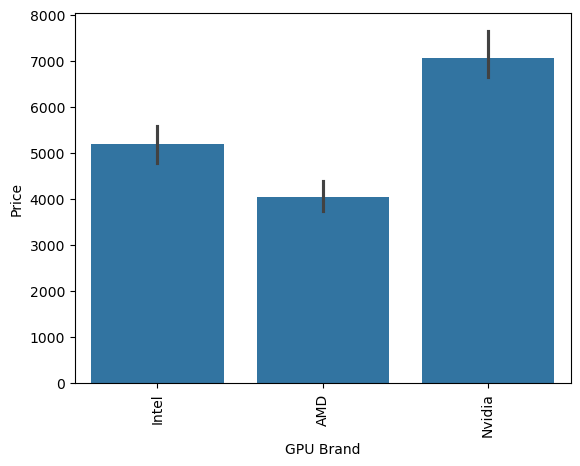

In [58]:
sns.barplot(x=data['GPU Brand'],y=data['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
# remove Gpu column
data.drop(columns=['GPU'], inplace = True)

In [60]:
data.head()

Manufacturer   Category  RAM Operating System  Weight     Price  \
0        Apple  Ultrabook    8            macOS    1.37   7889.09   
1        Apple  Ultrabook    8            macOS    1.34   5293.63   
2           HP   Notebook    8            No OS    1.86   3386.03   
3        Apple  Ultrabook   16            macOS    1.83  14942.39   
4        Apple  Ultrabook    8            macOS    1.37  10620.93   

   Touchscreen  Ips         ppi      CPU brand  HDD  SSD GPU Brand  
0            0    1  226.983005  Intel Core i5    0  128     Intel  
1            0    0  127.677940  Intel Core i5    0    0     Intel  
2            0    0  141.211998  Intel Core i5    0  256     Intel  
3            0    1  220.534624  Intel Core i7    0  512       AMD  
4            0    1  226.983005  Intel Core i5    0  256     Intel

In [61]:
# operating system values count
data['Operating System'].value_counts()

Operating System
Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: count, dtype: int64

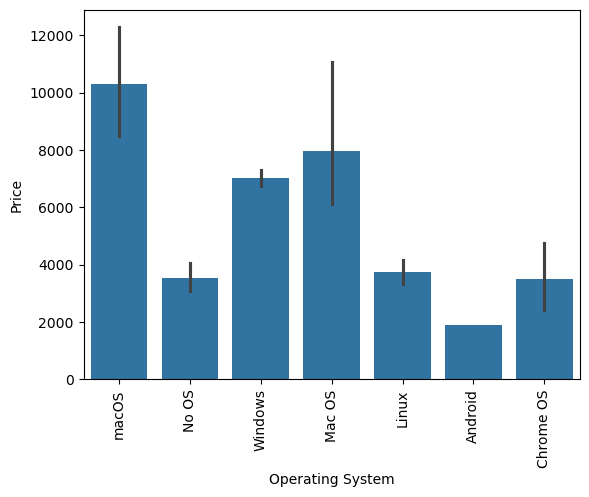

In [62]:
sns.barplot(x=data['Operating System'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
# create cat_os function and instabce variable is inp
def cat_os(inp):
    if inp == 'Windows':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [64]:
# craete os column and apply cat_os function on operating system
data['os'] = data['Operating System'].apply(cat_os)

In [65]:
data.head()

Manufacturer   Category  RAM Operating System  Weight     Price  \
0        Apple  Ultrabook    8            macOS    1.37   7889.09   
1        Apple  Ultrabook    8            macOS    1.34   5293.63   
2           HP   Notebook    8            No OS    1.86   3386.03   
3        Apple  Ultrabook   16            macOS    1.83  14942.39   
4        Apple  Ultrabook    8            macOS    1.37  10620.93   

   Touchscreen  Ips         ppi      CPU brand  HDD  SSD GPU Brand  \
0            0    1  226.983005  Intel Core i5    0  128     Intel   
1            0    0  127.677940  Intel Core i5    0    0     Intel   
2            0    0  141.211998  Intel Core i5    0  256     Intel   
3            0    1  220.534624  Intel Core i7    0  512       AMD   
4            0    1  226.983005  Intel Core i5    0  256     Intel   

                   os  
0                 Mac  
1                 Mac  
2  Others/No OS/Linux  
3                 Mac  
4                 Mac

In [66]:
# remove operating system column
data.drop(columns = ['Operating System'],inplace = True)

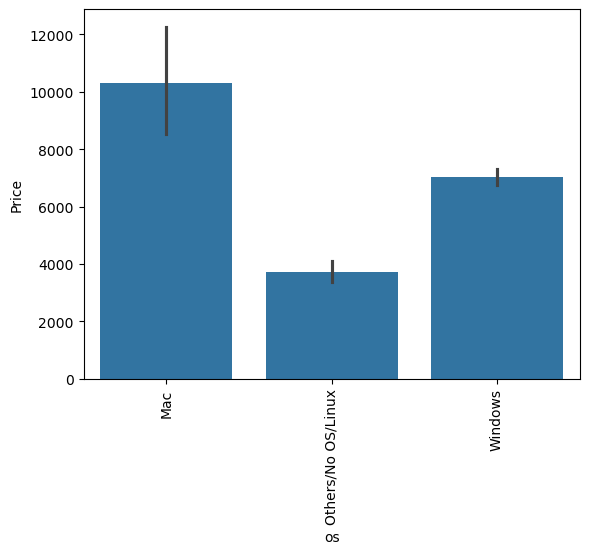

In [67]:
sns.barplot(x = data['os'], y = data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

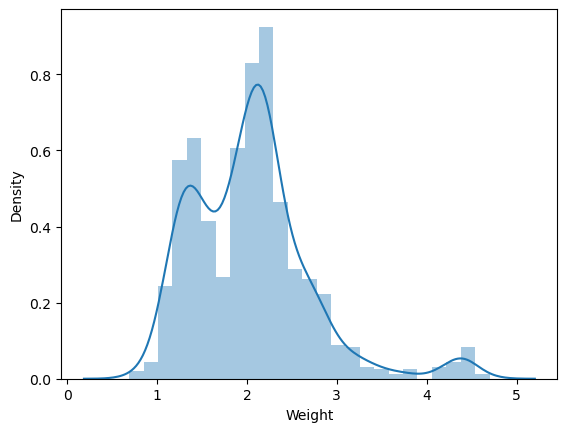

In [68]:
sns.distplot(data['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

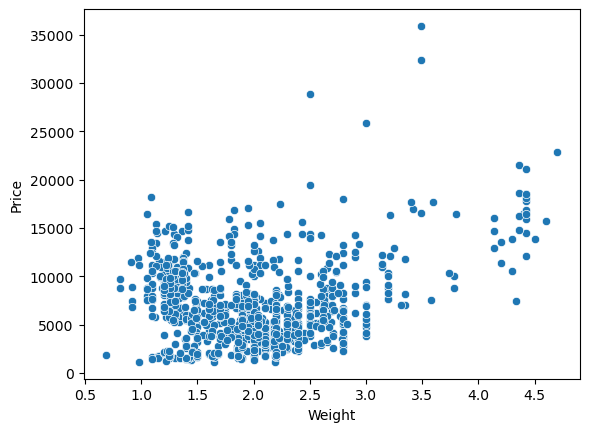

In [69]:
sns.scatterplot(x=data['Weight'],y=data['Price'])

<Axes: xlabel='Price', ylabel='Density'>

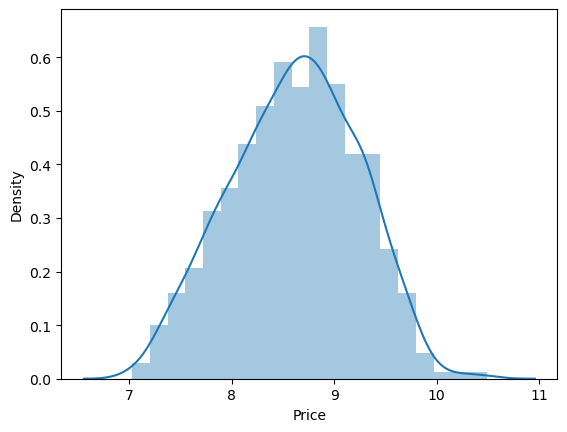

In [70]:
sns.distplot(np.log(data['Price']))

In [71]:
x = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [72]:
x

Manufacturer   Category  RAM  Weight  Touchscreen  Ips         ppi  \
0          Apple  Ultrabook    8    1.37            0    1  226.983005   
1          Apple  Ultrabook    8    1.34            0    0  127.677940   
2             HP   Notebook    8    1.86            0    0  141.211998   
3          Apple  Ultrabook   16    1.83            0    1  220.534624   
4          Apple  Ultrabook    8    1.37            0    1  226.983005   
..           ...        ...  ...     ...          ...  ...         ...   
972         Dell     Gaming   32    4.42            0    0  127.335675   
973      Toshiba   Notebook    8    1.95            0    0  157.350512   
974         Asus     Gaming   16    2.73            0    0  127.335675   
975           HP   Notebook    8    2.04            0    1  141.211998   
976       Lenovo   Notebook    4    1.70            0    0  111.935204   

         CPU brand   HDD  SSD GPU Brand                  os  
0    Intel Core i5     0  128     Intel                 Mac  
1    Intel Core i5     0    0     Intel                 Mac  
2    Intel Core i5     0  256     Intel  Others/No OS/Linux  
3    Intel Core i7     0  512       AMD                 Mac  
4    Intel Core i5     0  256     Intel                 Mac  
..             ...   ...  ...       ...                 ...  
972  Intel Core i7  1000  256    Nvidia             Windows  
973  Intel Core i5     0  256     Intel             Windows  
974  Intel Core i7  1000  256    Nvidia             Windows  
975  Intel Core i5  1000  128    Nvidia             Windows  
976  Intel Core i5     0    0     Intel             Windows  

[977 rows x 12 columns]

In [73]:
y

0      8.973236
1      8.574259
2      8.127413
3      9.611957
4      9.270582
         ...   
972    9.710417
973    8.846313
974    9.398588
975    8.659574
976    8.682796
Name: Price, Length: 977, dtype: float64

In [74]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,random_state = 2)

In [75]:
x_train

Manufacturer  Category  RAM  Weight  Touchscreen  Ips         ppi  \
799         Dell  Notebook    8    2.00            0    0  141.211998   
197           HP  Notebook    8    1.49            0    0  165.632118   
199           HP  Notebook    8    2.50            0    0  127.335675   
84          Acer  Notebook    4    2.10            0    0  100.454670   
412           HP  Notebook    4    2.10            0    0  141.211998   
..           ...       ...  ...     ...          ...  ...         ...   
534         Asus    Gaming    8    2.30            0    1  141.211998   
584         Dell   Netbook    4    1.26            0    0  135.094211   
493         Acer  Notebook    8    2.20            0    0  100.454670   
527       Lenovo  Notebook    8    2.20            0    0  100.454670   
168         Acer  Notebook    8    3.00            0    1  127.335675   

                 CPU brand   HDD  SSD GPU Brand                  os  
799          Intel Core i3     0  256       AMD             Windows  
197          Intel Core i5     0  512     Intel             Windows  
199          Intel Core i7     0  256    Nvidia             Windows  
84           AMD Processor  1000    0       AMD             Windows  
412          Intel Core i3  1000    0       AMD             Windows  
..                     ...   ...  ...       ...                 ...  
534          Intel Core i5  1000  128    Nvidia             Windows  
584  Other Intel Processor     0    0     Intel  Others/No OS/Linux  
493          AMD Processor  1000    0       AMD             Windows  
527          Intel Core i3  2000    0    Nvidia  Others/No OS/Linux  
168          Intel Core i5     0  256    Nvidia             Windows  

[830 rows x 12 columns]

In [76]:
#import libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# KNN

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7546901579693228
MAE 0.21705998533823148


# Decision Tree

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7731900709476582
MAE 0.20633021828638828


# Random Forest

In [80]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8603068962308764
MAE 0.17041997366806202


# Gradient Boost

In [81]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8775122119899321
MAE 0.16427939270991068


# XgBoost

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8684707021041973
MAE 0.1654219547319918


# Exporting the Model

In [83]:
import pickle

pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [84]:
data

Manufacturer   Category  RAM  Weight     Price  Touchscreen  Ips  \
0          Apple  Ultrabook    8    1.37   7889.09            0    1   
1          Apple  Ultrabook    8    1.34   5293.63            0    0   
2             HP   Notebook    8    1.86   3386.03            0    0   
3          Apple  Ultrabook   16    1.83  14942.39            0    1   
4          Apple  Ultrabook    8    1.37  10620.93            0    1   
..           ...        ...  ...     ...       ...          ...  ...   
972         Dell     Gaming   32    4.42  16488.48            0    0   
973      Toshiba   Notebook    8    1.95   6948.72            0    0   
974         Asus     Gaming   16    2.73  12071.33            0    0   
975           HP   Notebook    8    2.04   5765.08            0    1   
976       Lenovo   Notebook    4    1.70   5900.52            0    0   

            ppi      CPU brand   HDD  SSD GPU Brand                  os  
0    226.983005  Intel Core i5     0  128     Intel                 Mac  
1    127.677940  Intel Core i5     0    0     Intel                 Mac  
2    141.211998  Intel Core i5     0  256     Intel  Others/No OS/Linux  
3    220.534624  Intel Core i7     0  512       AMD                 Mac  
4    226.983005  Intel Core i5     0  256     Intel                 Mac  
..          ...            ...   ...  ...       ...                 ...  
972  127.335675  Intel Core i7  1000  256    Nvidia             Windows  
973  157.350512  Intel Core i5     0  256     Intel             Windows  
974  127.335675  Intel Core i7  1000  256    Nvidia             Windows  
975  141.211998  Intel Core i5  1000  128    Nvidia             Windows  
976  111.935204  Intel Core i5     0    0     Intel             Windows  

[977 rows x 13 columns]

In [85]:
x_train

Manufacturer  Category  RAM  Weight  Touchscreen  Ips         ppi  \
799         Dell  Notebook    8    2.00            0    0  141.211998   
197           HP  Notebook    8    1.49            0    0  165.632118   
199           HP  Notebook    8    2.50            0    0  127.335675   
84          Acer  Notebook    4    2.10            0    0  100.454670   
412           HP  Notebook    4    2.10            0    0  141.211998   
..           ...       ...  ...     ...          ...  ...         ...   
534         Asus    Gaming    8    2.30            0    1  141.211998   
584         Dell   Netbook    4    1.26            0    0  135.094211   
493         Acer  Notebook    8    2.20            0    0  100.454670   
527       Lenovo  Notebook    8    2.20            0    0  100.454670   
168         Acer  Notebook    8    3.00            0    1  127.335675   

                 CPU brand   HDD  SSD GPU Brand                  os  
799          Intel Core i3     0  256       AMD             Windows  
197          Intel Core i5     0  512     Intel             Windows  
199          Intel Core i7     0  256    Nvidia             Windows  
84           AMD Processor  1000    0       AMD             Windows  
412          Intel Core i3  1000    0       AMD             Windows  
..                     ...   ...  ...       ...                 ...  
534          Intel Core i5  1000  128    Nvidia             Windows  
584  Other Intel Processor     0    0     Intel  Others/No OS/Linux  
493          AMD Processor  1000    0       AMD             Windows  
527          Intel Core i3  2000    0    Nvidia  Others/No OS/Linux  
168          Intel Core i5     0  256    Nvidia             Windows  

[830 rows x 12 columns]

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  977 non-null    object 
 1   Category      977 non-null    object 
 2   RAM           977 non-null    int64  
 3   Weight        977 non-null    float64
 4   Price         977 non-null    float64
 5   Touchscreen   977 non-null    int32  
 6   Ips           977 non-null    int32  
 7   ppi           977 non-null    float64
 8   CPU brand     977 non-null    object 
 9   HDD           977 non-null    int64  
 10  SSD           977 non-null    int64  
 11  GPU Brand     977 non-null    object 
 12  os            977 non-null    object 
dtypes: float64(3), int32(2), int64(3), object(5)
memory usage: 91.7+ KB
